<a href="https://colab.research.google.com/github/tofa19/DMML-Project/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Essential Libraries ***

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load the dataset**

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/tofa19/DMML-Project/cfda92ba4b4b861831da7cfdb0d1017b65781fb8/music_genre.csv')

data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


# **Data cleaning**

In [31]:
	# Check the existing columns in your DataFrame
print(data.columns)

# Correct any typos or case mismatch in the column names being dropped
data.drop(['instance_id', 'track_name'], axis=1, inplace=True)

# If the columns were renamed in previous operations, use the new names
# Example: If 'duration_ms' was renamed to 'duration', use 'duration' instead of 'duration_ms' in the drop method


# Verify the remaining columns after the drop operation
print(data.columns)

data.dtypes

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')
Index(['artist_name', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date', 'valence',
       'music_genre'],
      dtype='object')


,0
artist_name,object
popularity,float64
acousticness,float64
danceability,float64
duration_ms,float64
energy,float64
instrumentalness,float64
key,object
liveness,float64
loudness,float64


In [32]:
data.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [33]:
data.isna().sum()

,0
artist_name,5
popularity,5
acousticness,5
danceability,5
duration_ms,5
energy,5
instrumentalness,5
key,5
liveness,5
loudness,5


In [34]:
data[data['music_genre'].isna()]

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [36]:
#deleting empty rows
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [37]:
#Object data types features
data.columns[data.dtypes == object]

Index(['artist_name', 'key', 'mode', 'tempo', 'obtained_date', 'music_genre'], dtype='object')

In [38]:
#Object data types features
data['tempo'].unique()

array(['100.889', '115.00200000000001', '127.994', ..., '112.97',
       '167.655', '99.20100000000001'], dtype=object)

In [39]:
data['music_genre'].unique()

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

In [40]:
data['key']=le.fit_transform(data['key'])
data['mode']=le.fit_transform(data['mode'])
data['music_genre'] = le.fit_transform(data['music_genre'])

# Print the numerical labels
print(data['music_genre'].value_counts())


music_genre
5    5000
1    5000
7    5000
0    5000
4    5000
8    5000
2    5000
9    5000
3    5000
6    5000
Name: count, dtype: int64


# **Data Preprocessing**

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['key']=le.fit_transform(data['key'])
data['mode']=le.fit_transform(data['mode'])
data['obtained_date']=le.fit_transform(data['obtained_date'])
data['artist_code'] = le.fit_transform(data['artist_name'])
data['music_genre'] = le.fit_transform(data['music_genre'])

In [42]:
data['key']=le.fit_transform(data['key'])
data['mode']=le.fit_transform(data['mode'])
data['music_genre'] = le.fit_transform(data['music_genre'])

# Print the numerical labels
print(data['music_genre'].value_counts())


music_genre
5    5000
1    5000
7    5000
0    5000
4    5000
8    5000
2    5000
9    5000
3    5000
6    5000
Name: count, dtype: int64


In [43]:
def art_genre(df):
    for row_label in df.index:
        art_genre = np.unique(df[df['artist_code'] == df.loc[row_label,'artist_code']]['music_genre'])
        #adding art_genre column in data
        df.loc[row_label,'art_genre'] = str(art_genre)
    return df
print(art_genre(data))
#encoding art_genre column
data['art_genre'] = le.fit_transform(data['art_genre'])

                artist_name  popularity  acousticness  danceability  \
0                  Röyksopp        27.0       0.00468         0.652   
1      Thievery Corporation        31.0       0.01270         0.622   
2            Dillon Francis        28.0       0.00306         0.620   
3                  Dubloadz        34.0       0.02540         0.774   
4               What So Not        32.0       0.00465         0.638   
...                     ...         ...           ...           ...   
49995                 BEXEY        59.0       0.03340         0.913   
49996             Roy Woods        72.0       0.15700         0.709   
49997                Berner        51.0       0.00597         0.693   
49998             The-Dream        65.0       0.08310         0.782   
49999     Naughty By Nature        67.0       0.10200         0.862   

       duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0             -1.0   0.941           0.79200    1     0.115    -5.20

In [44]:
data.head()


,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,artist_code,art_genre
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,3,0.759,5,5029,10
1,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.00200000000001,3,0.531,5,6117,46
2,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,3,0.333,5,1591,49
3,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,3,0.270,5,1707,49
4,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,3,0.323,5,6519,49


<Axes: >

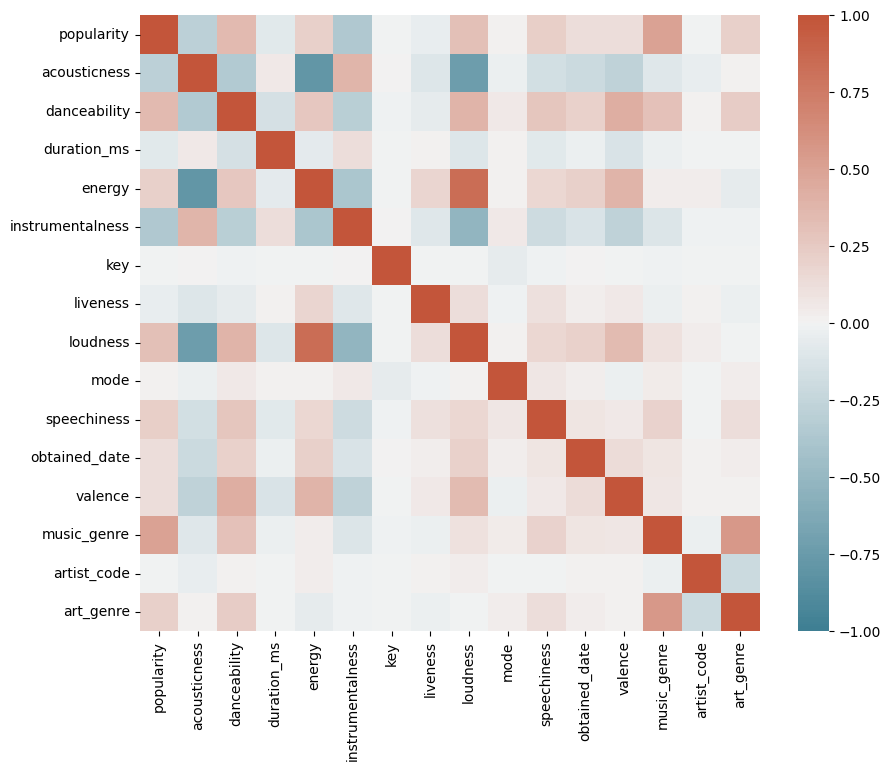

In [45]:
plt.rcParams['figure.figsize'] = 10, 8
sns.heatmap(data.select_dtypes(include=np.number).corr(),
             vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200))

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  object 
 1   popularity        50000 non-null  float64
 2   acousticness      50000 non-null  float64
 3   danceability      50000 non-null  float64
 4   duration_ms       50000 non-null  float64
 5   energy            50000 non-null  float64
 6   instrumentalness  50000 non-null  float64
 7   key               50000 non-null  int64  
 8   liveness          50000 non-null  float64
 9   loudness          50000 non-null  float64
 10  mode              50000 non-null  int64  
 11  speechiness       50000 non-null  float64
 12  tempo             50000 non-null  object 
 13  obtained_date     50000 non-null  int64  
 14  valence           50000 non-null  float64
 15  music_genre       50000 non-null  int64  
 16  artist_code       50000 non-null  int64 

In [47]:
import seaborn as sns

# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)

corr_matrix = numerical_data.corr()
correlations = corr_matrix['music_genre'].sort_values(ascending=False)
print(correlations)

music_genre         1.000000
art_genre           0.566813
popularity          0.502133
danceability        0.303463
speechiness         0.190536
loudness            0.102520
obtained_date       0.080009
valence             0.075065
mode                0.039832
energy              0.034738
key                -0.012184
artist_code        -0.025123
liveness           -0.025227
duration_ms        -0.028517
acousticness       -0.097969
instrumentalness   -0.110432
Name: music_genre, dtype: float64


In [48]:
data.drop([ 'key','tempo','artist_code','artist_name','liveness','duration_ms','obtained_date','energy'],axis=1,inplace=True)
print(data.head())
print(data.info())

   popularity  acousticness  danceability  instrumentalness  loudness  mode  \
0        27.0       0.00468         0.652           0.79200    -5.201     1   
1        31.0       0.01270         0.622           0.95000    -7.043     1   
2        28.0       0.00306         0.620           0.01180    -4.617     0   
3        34.0       0.02540         0.774           0.00253    -4.498     0   
4        32.0       0.00465         0.638           0.90900    -6.266     0   

   speechiness  valence  music_genre  art_genre  
0       0.0748    0.759            5         10  
1       0.0300    0.531            5         46  
2       0.0345    0.333            5         49  
3       0.2390    0.270            5         49  
4       0.0413    0.323            5         49  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity       

<Axes: >

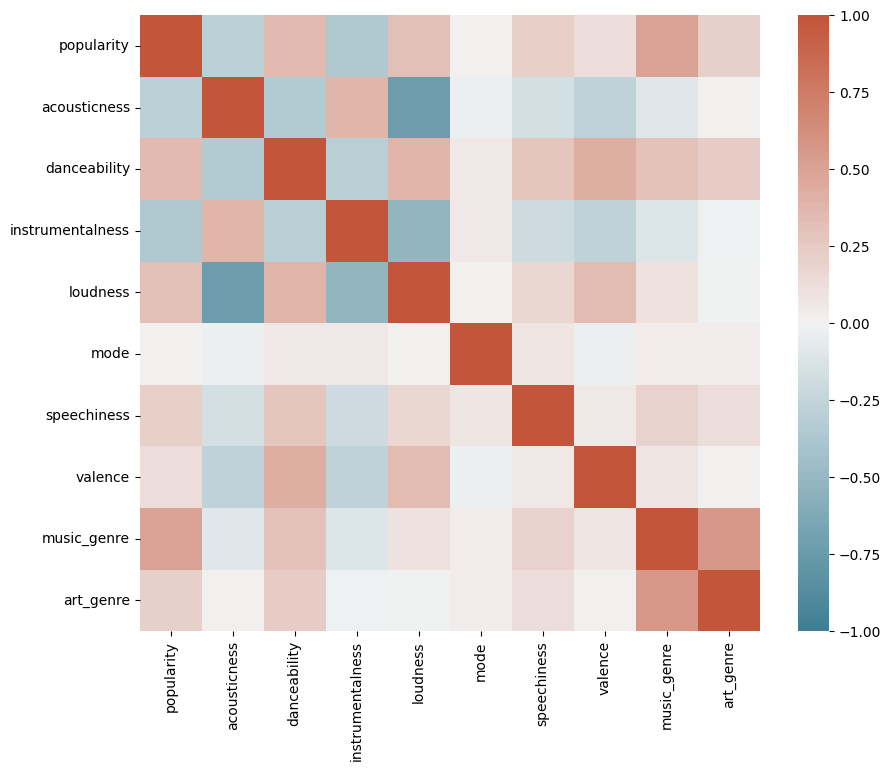

In [49]:
plt.rcParams['figure.figsize'] = 10, 8
sns.heatmap(data.select_dtypes(include=np.number).corr(),
             vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200))

# **MODEL IMPLEMENTATION**

We Will use Three Types of Model to evaluate this Dataset.

In [50]:
data.dropna(how='any', inplace=True)
from sklearn.model_selection import train_test_split
X = data.drop(columns=['music_genre'])
y = data['music_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify = y, random_state = 7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35000, 9) (15000, 9) (35000,) (15000,)


# ***Random Forest***


In [51]:
# Move data.dropna() before the train-test split
data.dropna(how='any', inplace=True)
from sklearn.model_selection import train_test_split
X = data.drop(columns=['music_genre'])
y = data['music_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify = y, random_state = 7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
clf.score(X_test, y_test)


(35000, 9) (15000, 9) (35000,) (15000,)


0.7853333333333333

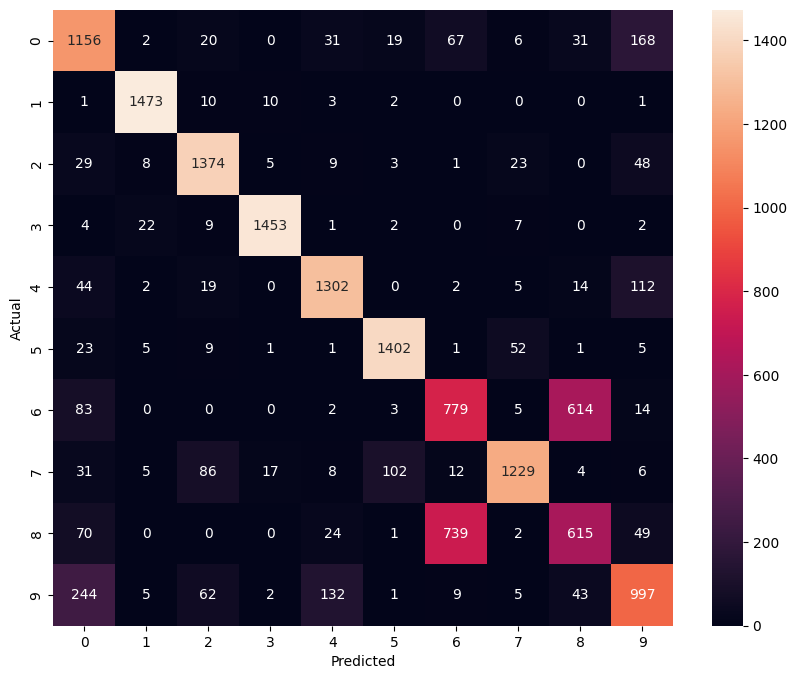

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1500
           1       0.97      0.98      0.97      1500
           2       0.86      0.92      0.89      1500
           3       0.98      0.97      0.97      1500
           4       0.86      0.87      0.86      1500
           5       0.91      0.93      0.92      1500
           6       0.48      0.52      0.50      1500
           7       0.92      0.82      0.87      1500
           8       0.47      0.41      0.44      1500
           9       0.71      0.66      0.69      1500

    accuracy                           0.79     15000
   macro avg       0.79      0.79      0.78     15000
weighted avg       0.79      0.79      0.78     15000



# ***LOGISTIC REGRESSION***




In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify = y, random_state = 7)
model_logReg = LogisticRegression()
model_logReg.fit(X_train, y_train)
model_logReg.score(X_test, y_test)

0.47573333333333334

In [55]:
y_pred_logReg = model_logReg.predict(X_test)

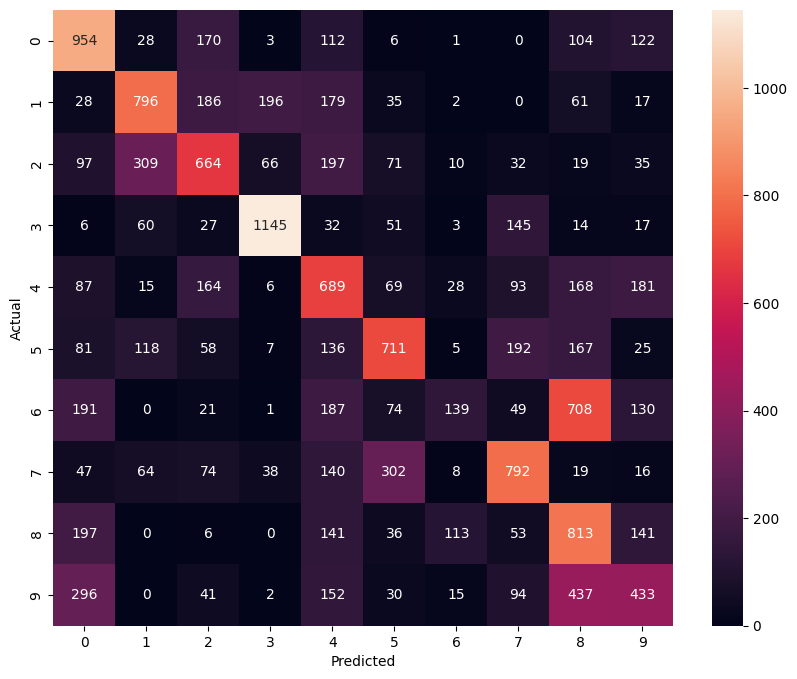

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_logReg), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logReg))

              precision    recall  f1-score   support

           0       0.48      0.64      0.55      1500
           1       0.57      0.53      0.55      1500
           2       0.47      0.44      0.46      1500
           3       0.78      0.76      0.77      1500
           4       0.35      0.46      0.40      1500
           5       0.51      0.47      0.49      1500
           6       0.43      0.09      0.15      1500
           7       0.55      0.53      0.54      1500
           8       0.32      0.54      0.41      1500
           9       0.39      0.29      0.33      1500

    accuracy                           0.48     15000
   macro avg       0.49      0.48      0.46     15000
weighted avg       0.49      0.48      0.46     15000



# ***XGBoost***

In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb= XGBClassifier(n_estimators=101,random_state=123,learning_rate=0.1)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
xgb.score(X_test,y_test)



0.8180666666666667

In [60]:
y_pred_xgb = xgb.predict(X_test)

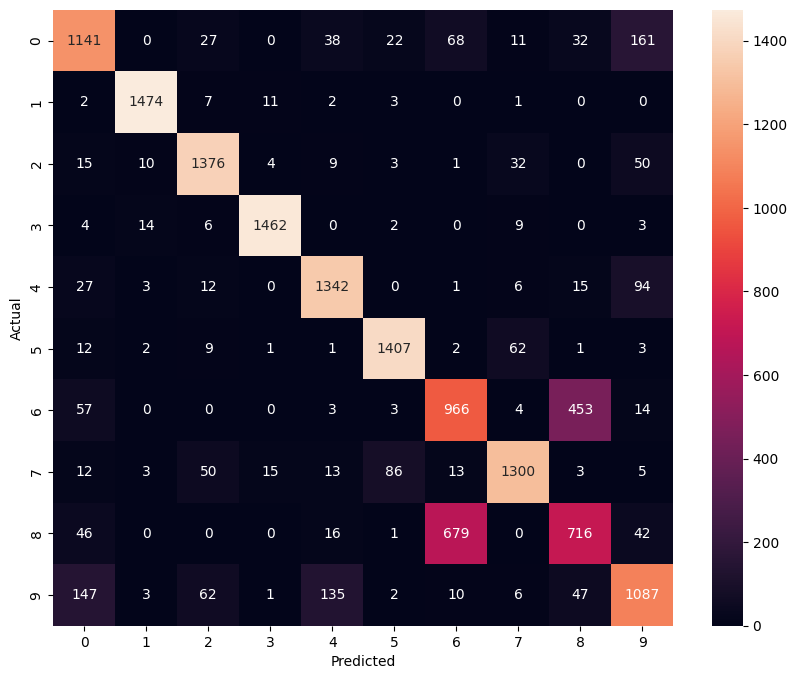

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1500
           1       0.98      0.98      0.98      1500
           2       0.89      0.92      0.90      1500
           3       0.98      0.97      0.98      1500
           4       0.86      0.89      0.88      1500
           5       0.92      0.94      0.93      1500
           6       0.56      0.64      0.60      1500
           7       0.91      0.87      0.89      1500
           8       0.57      0.48      0.52      1500
           9       0.75      0.72      0.73      1500

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000



# ***K Nearest Neighbor***

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
test_ratio = 0.2
random_state = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = random_state,shuffle = True,stratify = y)
number_of_neighbors = np.arange(3, 25, 2)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors": number_of_neighbors}

grid_search = GridSearchCV(estimator = model_KNN,param_grid = params, cv = 6)

In [64]:
grid_search.fit(X_train, y_train)
grid_search.best_score_


0.8015251840168266

In [65]:
y_pred_knn = grid_search.predict(X_test)

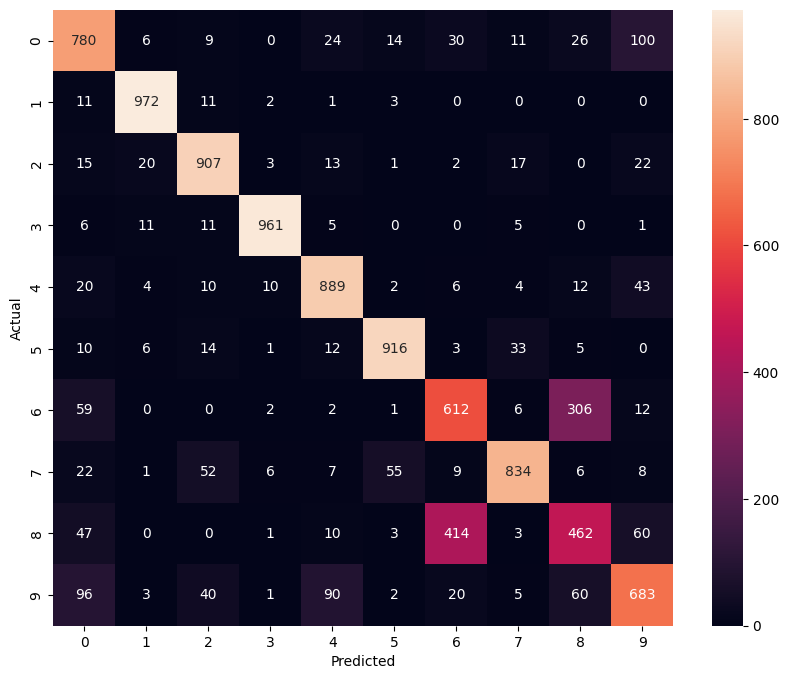

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76      1000
           1       0.95      0.97      0.96      1000
           2       0.86      0.91      0.88      1000
           3       0.97      0.96      0.97      1000
           4       0.84      0.89      0.87      1000
           5       0.92      0.92      0.92      1000
           6       0.56      0.61      0.58      1000
           7       0.91      0.83      0.87      1000
           8       0.53      0.46      0.49      1000
           9       0.74      0.68      0.71      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



# ***SVM***

In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
model_svm = SVC(random_state = random_state)
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.7473

In [69]:
y_pred_svm = model_svm.predict(X_test)

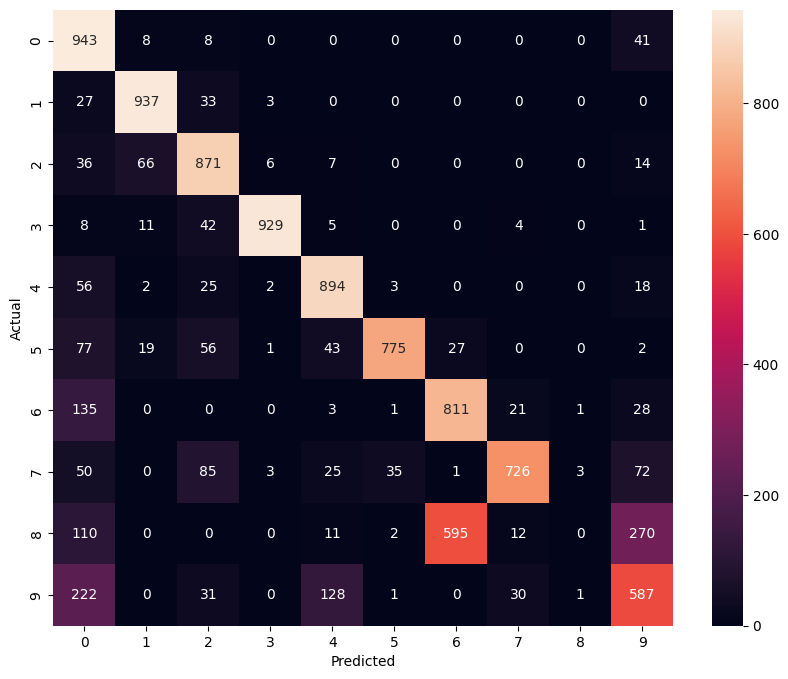

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.57      0.94      0.71      1000
           1       0.90      0.94      0.92      1000
           2       0.76      0.87      0.81      1000
           3       0.98      0.93      0.96      1000
           4       0.80      0.89      0.84      1000
           5       0.95      0.78      0.85      1000
           6       0.57      0.81      0.67      1000
           7       0.92      0.73      0.81      1000
           8       0.00      0.00      0.00      1000
           9       0.57      0.59      0.58      1000

    accuracy                           0.75     10000
   macro avg       0.70      0.75      0.71     10000
weighted avg       0.70      0.75      0.71     10000



# **Results Comparison**

In [72]:
models = [ KNeighborsClassifier(),RandomForestClassifier(), LogisticRegression(random_state=random_state), XGBClassifier(),SVC()]
scores = {} # Name == 1%
for model in models:
  model.fit(X_train,y_train)
  scores[type(model).__name__] = model.score(X_test,y_test)*100

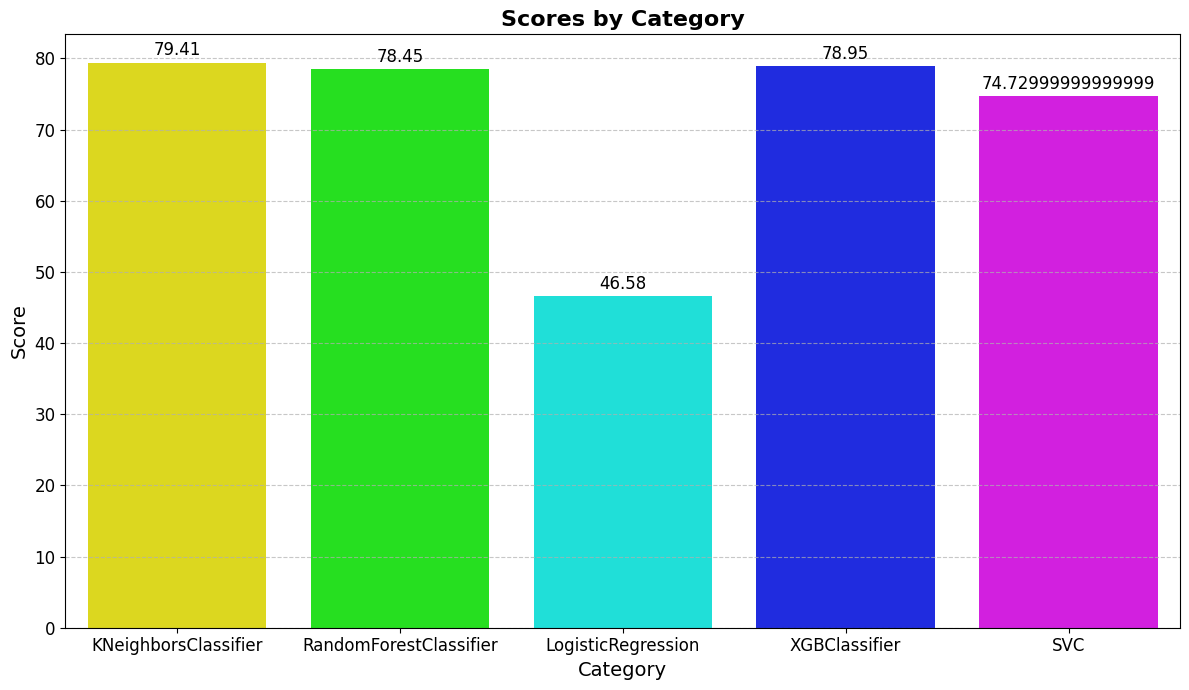

In [73]:
palette = sns.color_palette("hsv", len(scores))  # Generate a colorful palette

# Create the plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette=palette)

# Add data labels to the bars
for index, value in enumerate(scores.values()):
    ax.text(index, value + 1, str(value), ha='center', fontsize=12, color='black')

# Improve aesthetics
plt.title("Scores by Category", fontsize=16, fontweight='bold')
plt.xlabel("Category", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()